#**Intruder detection**






In [2]:
import tensorflow as tf
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df=pd.read_csv('/content/drive/MyDrive/intruder_detection/dataframe.csv')
df

,file name,label
0,/content/drive/MyDrive/intruder_detection/resi...,1
1,/content/drive/MyDrive/intruder_detection/resi...,1
2,/content/drive/MyDrive/intruder_detection/resi...,1
3,/content/drive/MyDrive/intruder_detection/resi...,1
4,/content/drive/MyDrive/intruder_detection/resi...,1
...,...,...
606,/content/drive/MyDrive/intruder_detection/resi...,0
607,/content/drive/MyDrive/intruder_detection/resi...,0
608,/content/drive/MyDrive/intruder_detection/resi...,0
609,/content/drive/MyDrive/intruder_detection/resi...,0


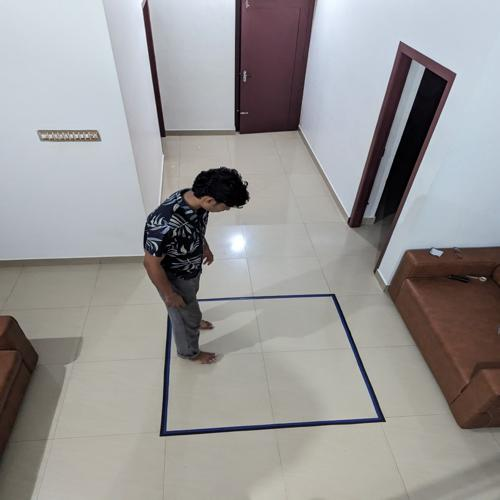

In [6]:
img=cv2.imread(df['file name'][67])
cv2_imshow(img)

In [7]:
img.shape

(500, 500, 3)

In [8]:
img_size=img.shape

In [9]:
# df=df.head(700)
# df.shape
# df

In [10]:
x=[]
y=[]

for img,target in zip(df['file name'],df['label']):
  x.append(cv2.imread(img))
  y.append(target)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=15,shuffle=True)

In [13]:
x_train = np.array(x_train)/255
x_test = np.array(x_test) /255

x_train = x_train.reshape(-1, img_size[0], img_size[1], img_size[2])
y_train = np.array(y_train)

x_test = x_test.reshape(-1, img_size[0], img_size[1], img_size[2])
y_test = np.array(y_test)

In [14]:

model = Sequential()
model.add(Conv2D(32,3,padding='same',activation='relu', input_shape=(img_size[0], img_size[1], img_size[2])))
model.add(MaxPool2D(2))

# model.add(Conv2D(10, 3, padding="same", activation="relu"))
# model.add(Dropout(0.4))
# model.add(tf.keras.layers.BatchNormalization())



model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D(2))
#model.add(Dropout(0.5))

# model.add(tf.keras.layers.BatchNormalization())



model.add(Flatten())
model.add(Dense(100,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [15]:
model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.002),  metrics=['accuracy'])


In [16]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
# model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

In [ ]:

history = model.fit(
    x_train,
    y_train,
    epochs=13,
    validation_data = (x_test, y_test),
    callbacks=[early_stopping, model_checkpoint])




Epoch 1/13
16/16 [==============================] - 276s 17s/step - loss: 27.6967 - accuracy: 0.6762 - val_loss: 0.0928 - val_accuracy: 0.9431
Epoch 2/13
16/16 [==============================] - 260s 16s/step - loss: 0.0761 - accuracy: 0.9693 - val_loss: 0.0614 - val_accuracy: 0.9837
Epoch 3/13
16/16 [==============================] - 255s 16s/step - loss: 0.0263 - accuracy: 0.9877 - val_loss: 0.0577 - val_accuracy: 0.9837
Epoch 4/13
16/16 [==============================] - 249s 16s/step - loss: 0.0174 - accuracy: 0.9918 - val_loss: 0.0831 - val_accuracy: 0.9675
Epoch 5/13
16/16 [==============================] - 260s 16s/step - loss: 0.0073 - accuracy: 0.9980 - val_loss: 0.0490 - val_accuracy: 0.9675
Epoch 6/13
16/16 [==============================] - 250s 16s/step - loss: 0.0060 - accuracy: 0.9980 - val_loss: 0.0575 - val_accuracy: 0.9756
Epoch 7/13
16/16 [==============================] - 247s 16s/step - loss: 0.0190 - accuracy: 0.9918 - val_loss: 0.0881 - val_accuracy: 0.9756
Epoch

In [ ]:
# history=model.fit(x_train,y_train,epochs = 5, validation_data = (x_test, y_test))

In [18]:
import joblib
joblib.dump(model,'/content/drive/MyDrive/intruder_detection/model.joblib')

['/content/drive/MyDrive/intruder_detection/model.joblib']

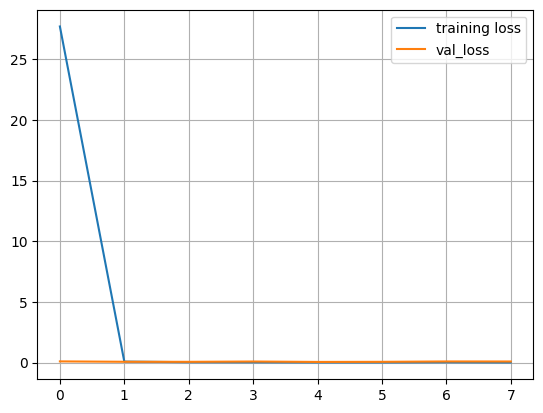

In [19]:
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.grid(True)
plt.legend()

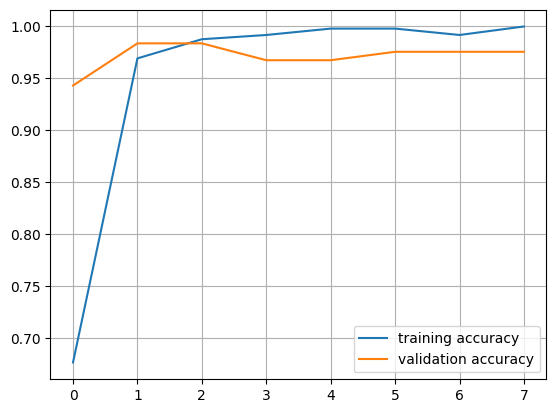

In [20]:
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.grid(True)
plt.legend()

##Testing model

In [60]:
model.evaluate(x_test,y_test)

4/4 [==============================] - 21s 4s/step - loss: 0.0849 - accuracy: 0.9756


[0.0848529040813446, 0.9756097793579102]

In [138]:
def testing(i):
    pred = model.predict(x_test[i].reshape(-1, 500, 500, 3))
    img = x_test[i] * 255

    if pred > 0.5:
        label = 'Inside'
        color = (0, 0, 255)
    else:
        label = 'Outside'
        color = (0, 255, 0)


    img_with_text = img.copy()
    corners = np.array([[172, 310],[339, 310],[374, 448],[147, 449]],dtype=np.int32)
    cv2.polylines(img_with_text, [corners], isClosed=True, color=color, thickness=4)
    cv2.putText(img_with_text, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
    plt.figure(figsize=(6, 6))
    cv2_imshow(img_with_text.astype(np.uint8))
    plt.show()

1/1 [==============================] - 0s 282ms/step


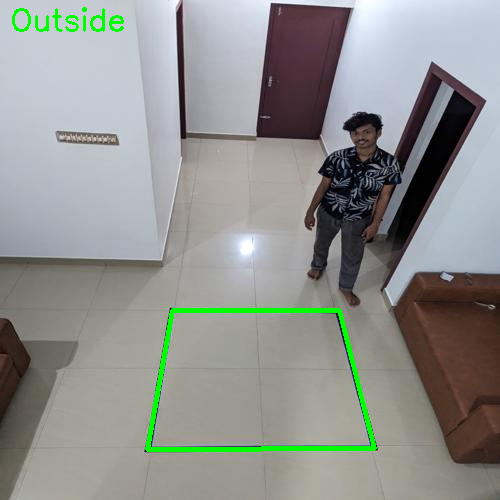

<Figure size 600x600 with 0 Axes>

In [139]:
testing(20)

1/1 [==============================] - 0s 209ms/step


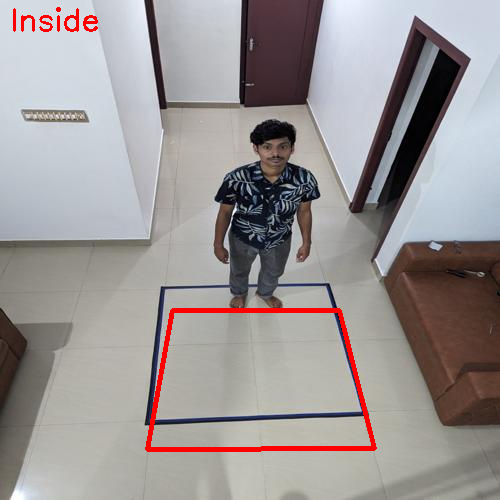

<Figure size 600x600 with 0 Axes>

In [144]:
testing(35)

#Testing model on video

In [26]:
def predict_frame(img):
    img_array = tf.keras.utils.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    prediction=(model.predict(img_batch) > 0.5).astype("int32")
    if(prediction[0][0]==1):
        return("inside")
    else:
        return("outside")

In [28]:
import cv2
import numpy as np
from IPython.display import display, Image
import tensorflow as tf

# Assuming you have a predict_frame function defined

image = []
label = []

c = 1
cap = cv2.VideoCapture('/content/drive/MyDrive/intruder_detection/images_of_intruder/PXL_20230812_130748865.TS.mp4')
while True:
    grabbed, frame = cap.read()
    if not grabbed:
        break  # Break the loop if no more frames can be grabbed
    if c % 5 == 0:
        print(c)
        resized_frame = tf.image.resize(frame, (500, 500), method='bilinear')
        normalized_frame = resized_frame / 255.0
        uint8_frame = tf.image.convert_image_dtype(normalized_frame, dtype=tf.uint8)
        image.append(uint8_frame.numpy())
        label.append(predict_frame(resized_frame))
        if len(image) == 75:
            break
    c += 1

cap.release()


5
1/1 [==============================] - 0s 489ms/step
10
1/1 [==============================] - 0s 484ms/step
15
1/1 [==============================] - 1s 626ms/step
20
1/1 [==============================] - 1s 530ms/step
25
1/1 [==============================] - 1s 659ms/step
30
1/1 [==============================] - 0s 323ms/step
35
1/1 [==============================] - 0s 430ms/step
40
1/1 [==============================] - 0s 430ms/step
45
1/1 [==============================] - 0s 311ms/step
50
1/1 [==============================] - 0s 248ms/step
55
1/1 [==============================] - 0s 270ms/step
60
1/1 [==============================] - 0s 342ms/step
65
1/1 [==============================] - 0s 328ms/step
70
1/1 [==============================] - 0s 306ms/step
75
1/1 [==============================] - 0s 260ms/step
80
1/1 [==============================] - 0s 362ms/step
85
1/1 [==============================] - 0s 449ms/step
90
1/1 [==============================] - 0s 491m

In [29]:
label

['outside',
 'outside',
 'outside',
 'outside',
 'outside',
 'outside',
 'outside',
 'outside',
 'inside',
 'inside',
 'inside',
 'inside',
 'inside',
 'inside',
 'inside',
 'inside',
 'inside',
 'inside',
 'inside',
 'inside',
 'inside',
 'inside',
 'inside',
 'outside',
 'outside',
 'outside',
 'outside',
 'outside',
 'outside',
 'outside',
 'outside',
 'outside',
 'outside',
 'inside',
 'inside',
 'inside',
 'inside',
 'inside',
 'inside',
 'inside',
 'inside',
 'inside',
 'inside',
 'inside',
 'inside',
 'inside',
 'inside']

In [149]:
def testing_on_video(i):
    img=image[i]
    text=label[i]
    # img_with_text = img.copy()
    if text=='inside':
      color = (0, 0, 255)

    else:
      color = (0, 255, 0)
    corners = np.array([[163, 298],[355, 298],[407, 412],[154, 425]],dtype=np.int32)
    cv2.polylines(img, [corners], isClosed=True, color=color, thickness=3)

    cv2.putText(img, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
    cv2_imshow(img.astype(np.uint8))

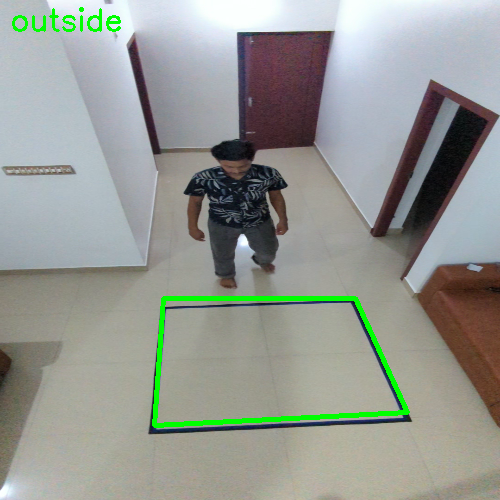

In [150]:
testing_on_video(5)

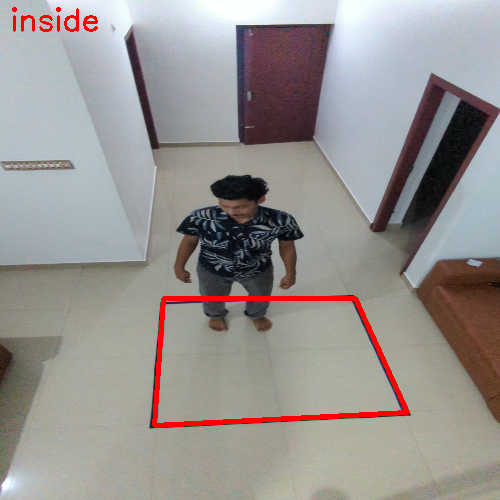

In [152]:
testing_on_video(18)

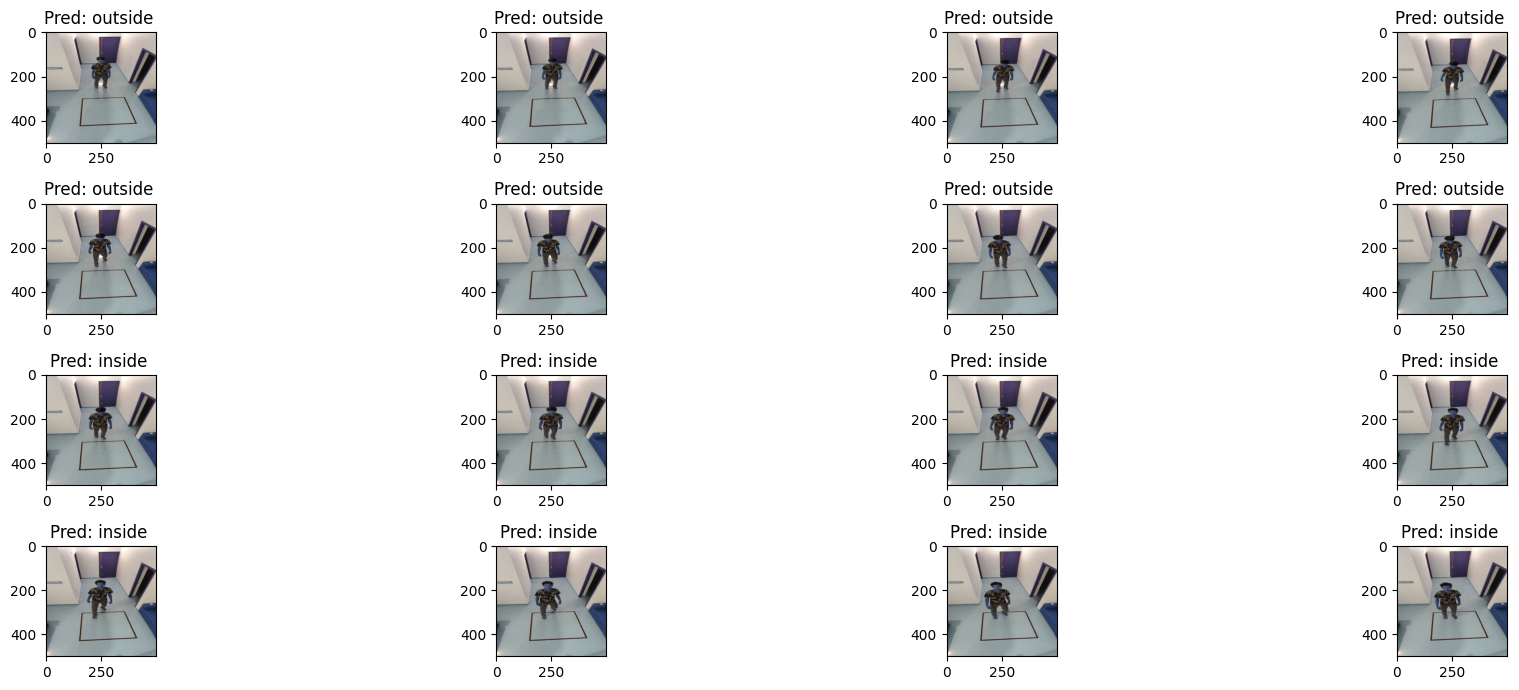

In [58]:
plt.figure(figsize = (20, 7))
for i in range(16):
  plt.subplot(4, 4, (i + 1))

  plt.imshow(image[i])
  plt.title('Pred: {} '.format(label[i]))
plt.tight_layout()
plt.show()



##Applying to video

In [55]:


outputpath = '/content/drive/MyDrive/intruder_detection'
videopath = '/content/drive/MyDrive/intruder_detection/images_of_intruder/PXL_20230812_130748865.TS.mp4'


cap = cv2.VideoCapture(videopath)
frame_width = 500
frame_height = 500
fps = 30.0

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(outputpath, fourcc, fps, (frame_width, frame_height))



while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        break
    resized_frame = cv2.resize(frame, (frame_width, frame_height))
    prediction = predict_frame(resized_frame)

    normalized_frame = resized_frame / 255.0
    uint8_frame = tf.image.convert_image_dtype(normalized_frame, dtype=tf.uint8)

    uint8_frame_np = uint8_frame.numpy()

    text = "Prediction: {}".format(prediction)
    cv2.putText(uint8_frame_np, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    out.write(uint8_frame_np)


    # cv2_imshow(frame)


    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
out.release()



1/1 [==============================] - 0s 172ms/step
